### Task 1.2.

Simulate how the data would be if it is cleaned following my proposal

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None) # show full dataframe

In [3]:
# import data
train_val = pd.read_csv("../data/training_set_values.csv")
train_label = pd.read_csv("../data/training_set_labels.csv")

In [4]:
# merge train_set_values and train_set_labels on ID
train_data = pd.merge(train_val, train_label, on="id")

# convert data type of "date_recorded" into datetime object since we can't see the timeline with string 
train_data["date_recorded"] = pd.to_datetime(train_data['date_recorded'])
type(train_data["date_recorded"][0])

# train_data

C:\Users\Owner\AppData\Local\Temp\ipykernel_2376\2180619718.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_data["date_recorded"] = pd.to_datetime(train_data['date_recorded'])


pandas._libs.tslibs.timestamps.Timestamp

In [5]:
# extract year from date_recorded
train_data["year_recorded"] = pd.DatetimeIndex(train_data["date_recorded"]).year
train_data["diff_year"] = train_data["year_recorded"] - train_data["construction_year"]
train_data.loc[train_data["diff_year"]<0]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,diff_year
8729,20198,0.0,2004-05-01,Government Of Tanzania,86,DWE,38.959776,-5.247278,Kwa Bi Shoga,0,Pangani,Mapojoni Kati,Tanga,4,4,Muheza,Ngomeni,120,True,GeoData Consultants Ltd,VWC,Borehole,True,2008,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty abandoned,salty,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,2004,-4
10441,55069,20.0,2004-12-01,Plan Int,307,DDCA,38.768656,-7.298419,Mianzi Primary School,0,Rufiji,Momboni,Pwani,60,33,Kisarawe,Msanga,1,True,GeoData Consultants Ltd,VWC,NaN,False,2006,india mark iii,india mark iii,handpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,hand pump,hand pump,non functional,2004,-2
13366,48759,100.0,2004-06-01,Mgaya,1331,Mgaya,34.290885,-1.699609,Maro Mgaya,0,Lake Victoria,Kibaoni,Mara,20,2,Serengeti,Kenyamonta,80,NaN,GeoData Consultants Ltd,Other,NaN,True,2011,other - rope pump,rope pump,rope pump,other,other,pay per bucket,per bucket,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2004,-7
23373,20534,50.0,2004-03-01,Tasaf And Lga,239,TASAFcitizen and LGA,39.272736,-11.019000,Juhudi,0,Ruvuma / Southern Coast,Mwanona,Mtwara,90,33,Newala,Luchingu,317,True,GeoData Consultants Ltd,VWC,Mwanona,False,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe,functional,2004,-5
27501,53086,500.0,2004-01-07,Kkkt,1611,Villagers,34.900561,-8.873813,Kwa Barnabasi Kilumile,0,Rufiji,Mlowa,Iringa,11,4,Njombe,Makambako,65,True,GeoData Consultants Ltd,VWC,NaN,False,2009,nira/tanira,nira/tanira,handpump,vwc,user-group,pay when scheme fails,on failure,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump,functional,2004,-5
32619,9195,0.0,2004-03-01,Caltus,1856,Cultus,31.539761,-7.983106,Kwa Pambajila,0,Lake Tanganyika,Magomeni,Rukwa,15,4,Sumbawanga Urban,Kasense,900,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa kasen,True,2005,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,2004,-1
33942,5971,0.0,2004-03-01,Amref,-27,AMREF,39.283105,-7.422852,Kwa Ndevu,0,Rufiji,Gundani,Pwani,6,4,Mkuranga,Magawa,200,True,GeoData Consultants Ltd,VWC,NaN,False,2007,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,2004,-3
39559,15921,0.0,2004-03-06,Tasafu,301,DWE,38.558421,-5.140405,Shuleni,0,Pangani,Kiwanjani,Tanga,4,2,Korogwe,Kwagunda,713,True,GeoData Consultants Ltd,VWC,NaN,False,2009,other,other,other,vwc,user-group,never pay,never pay,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,non functional,2004,-5
48555,1251,0.0,2004-12-01,African 2000 Network,284,Karugendo,38.929212,-7.111349,Kauzeni Primary School 2,0,Wami / Ruvu,Kauzeni Chini,Pwani,60,33,Kisarawe,Kibuta,185,True,GeoData Consultants Ltd,Private operator,NaN,False,2008,gravity,gravity,gravity,private operator,commercial,never pay,never pay,soft,good,enough,enough,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2004,-4


In [6]:
# drop row if 
# date_recorded - construction_year < 0
# construction_year == 0

cleaned_df = train_data[(train_data["diff_year"] >= 0) & 
                         (train_data["construction_year"]!=0)]
len(cleaned_df)

38682

In [ ]:
# to proove my proposal

# features = ["basin", "extraction_type", "extraction_type_class", "extraction_type_group", 
#             "management_group", "water_quality", "waterpoint_type", "waterpoint_type_group","status_group"]

In [ ]:
# to proove my proposal
features = ["basin", "source","management_group", "management", "quality_group", "payment",
            "region", "payment_type", "quantity_group", "extraction_type_class", 
            "waterpoint_type_group",
            "construction_year", "gps_height", "population", "status_group"]

In [ ]:
# # my proposal

# features =  ["quantity_group", "region", "payment_type", "extraction_type_class", 
#              "management", "quality_group", "construction_year", "gps_height", "population"]

In [9]:
cleaned_df = cleaned_df[features]
cleaned_df.fillna("unknown")
# cleaned_df = train_data

,basin,source,management_group,management,quality_group,payment,region,payment_type,quantity_group,extraction_type_class,waterpoint_type_group,construction_year,gps_height,population,status_group
0,Lake Nyasa,spring,user-group,vwc,good,pay annually,Iringa,annually,enough,gravity,communal standpipe,1999,1390,109,functional
1,Lake Victoria,rainwater harvesting,user-group,wug,good,never pay,Mara,never pay,insufficient,gravity,communal standpipe,2010,1399,280,functional
2,Pangani,dam,user-group,vwc,good,pay per bucket,Manyara,per bucket,enough,gravity,communal standpipe,2009,686,250,functional
3,Ruvuma / Southern Coast,machine dbh,user-group,vwc,good,never pay,Mtwara,never pay,dry,submersible,communal standpipe,1986,263,58,non functional
5,Pangani,other,user-group,vwc,salty,pay per bucket,Tanga,per bucket,enough,submersible,communal standpipe,2009,0,1,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59391,Pangani,river,user-group,vwc,good,never pay,Kilimanjaro,never pay,enough,gravity,communal standpipe,1967,540,210,non functional
59394,Wami / Ruvu,machine dbh,user-group,vwc,good,pay monthly,Morogoro,monthly,enough,submersible,communal standpipe,2007,351,89,non functional
59395,Pangani,spring,user-group,water board,good,pay per bucket,Kilimanjaro,per bucket,enough,gravity,communal standpipe,1999,1210,125,functional
59396,Rufiji,river,user-group,vwc,good,pay annually,Iringa,annually,enough,gravity,communal standpipe,1996,1212,56,functional


In [10]:
import numpy as np
# Missing values are NaN (e.g. null) or zero value or unknown
# So, find the missing values

columns_null = []
columns_zero = []
columns_unknown = []


for col in cleaned_df.columns:

    # search columns which contain null
    if cleaned_df[col].isna().values.any() == True:
        columns_null.append(col)
        
    # search columns which contain zero
    elif 0 in cleaned_df[col].unique():
        columns_zero.append(col)

    # search columns which contain unknown
    elif "unknown" in cleaned_df[col].unique():
        columns_unknown.append(col)
        
    elif "Unknown" in cleaned_df[col].unique():
        columns_unknown.append(col)


# count the number of rows containing null and create a data frame
null_data = pd.DataFrame(cleaned_df[columns_null].isna().sum()).reset_index()
null_data.columns = ["col_name", "num_of_null"]
null_data["percent_of_null"] = null_data["num_of_null"] / len(cleaned_df)*100

# count the number of rows containing zero and create a data frame
zero_data = pd.DataFrame(cleaned_df[columns_zero].isin([0]).sum()).reset_index()
zero_data.columns = ["col_name", "num_of_zero"]
zero_data["percent_of_zero"] = zero_data["num_of_zero"] / len(cleaned_df)*100

# count the number of rows containing unknown and create a data frame
unknown_data = pd.DataFrame(cleaned_df[columns_unknown].isin(["unknown", "Unknown"]).sum()).reset_index()
unknown_data.columns = ["col_name", "num_of_unknown"]
unknown_data["percent_of_unknown"] = unknown_data["num_of_unknown"] / len(cleaned_df) * 100

# merging all dataframes
missing_value = pd.merge(null_data, zero_data, how="outer", sort=True)
missing_value = pd.merge(missing_value, unknown_data, how="outer", sort=True)
missing_value = missing_value.replace(np.nan, 0)

# counts sum of missing values and calculate percentage
missing_value["sum_of_missing_value"] = missing_value["num_of_null"] + missing_value["num_of_zero"] + missing_value["num_of_unknown"]
missing_value["percent_of_missing_value"] = missing_value["sum_of_missing_value"] / len(cleaned_df) * 100 
missing_value

,col_name,num_of_null,percent_of_null,num_of_zero,percent_of_zero,num_of_unknown,percent_of_unknown,sum_of_missing_value,percent_of_missing_value
0,gps_height,0.0,0.0,763.0,1.972494,0.0,0.000000,763.0,1.972494
1,management,0.0,0.0,0.0,0.000000,354.0,0.915154,354.0,0.915154
2,management_group,0.0,0.0,0.0,0.000000,354.0,0.915154,354.0,0.915154
3,payment,0.0,0.0,0.0,0.000000,5086.0,13.148234,5086.0,13.148234
4,payment_type,0.0,0.0,0.0,0.000000,5086.0,13.148234,5086.0,13.148234
5,population,0.0,0.0,1347.0,3.482240,0.0,0.000000,1347.0,3.482240
6,quality_group,0.0,0.0,0.0,0.000000,1188.0,3.071196,1188.0,3.071196
7,quantity_group,0.0,0.0,0.0,0.000000,515.0,1.331369,515.0,1.331369
8,source,0.0,0.0,0.0,0.000000,30.0,0.077555,30.0,0.077555


# chi square test

In [11]:
# create dataframe only with categorical data

df_categorical= pd.DataFrame(data = cleaned_df.dtypes, columns = ['a']).reset_index()

categorical_variables = list(df_categorical['index'].loc[df_categorical['a'] == 'object'])
df_categorical = cleaned_df[categorical_variables]

print(df_categorical.shape)


(38682, 12)


In [12]:
# # perform chi square test

# # reference: https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables

# factors_paired = [(i,j) for i in df_categorical.columns.values for j in df_categorical.columns.values] 

# chi2, p_values =[], []

# for f in factors_paired:
#     if f[0] != f[1]:
#         chitest = chi2_contingency(pd.crosstab(df_categorical[f[0]], df_categorical[f[1]]))   
#         chi2.append(chitest[0])
#         p_values.append(chitest[1])
#     else:      # for same factor pair
#         chi2.append(0)
#         p_values.append(0)
        

# chi2 = np.array(chi2).reshape((8,8)) # shape it as a matrix
# chi2 = pd.DataFrame(chi2, index=df_categorical.columns, columns=df_categorical.columns) # then a df for convenience


# p_values = np.array(p_values).reshape((8,8)) # shape it as a matrix
# p_values = pd.DataFrame(p_values, index=df_categorical.columns, columns=df_categorical.columns) # then a df for convenience

In [13]:
# p_values

# Cramer V test

Else condition Met:  1.0000000000000002
Else condition Met:  0.26606109393263844
Else condition Met:  0.16494362794562523
Else condition Met:  0.24202511467480814
Else condition Met:  0.14600310659922833
Else condition Met:  0.2419529201603765
Else condition Met:  0.8190110971275936
Else condition Met:  0.2419529201603765
Else condition Met:  0.1711059251835439
Else condition Met:  0.24935540281401838
Else condition Met:  0.1890704847906106
Else condition Met:  0.17702871066966894
Else condition Met:  0.26606109393263844
Else condition Met:  1.0
Else condition Met:  0.20035514254549147
Else condition Met:  0.19439943334276355
Else condition Met:  0.18791051581352453
Else condition Met:  0.18790762213515314
Else condition Met:  0.3144662687827818
Else condition Met:  0.18790762213515314
Else condition Met:  0.19962953125674673
Else condition Met:  0.44839959573640514
Else condition Met:  0.3703821839571332
Else condition Met:  0.1850768888630221
Else condition Met:  0.16494362794562523


C:\Users\Owner\AppData\Local\Temp\ipykernel_2376\3193110830.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cramer.fillna(value=np.nan,inplace=True)


Else condition Met:  0.13625128133004677
Else condition Met:  0.23078139085123914
Else condition Met:  0.13625128133004674
Else condition Met:  0.19735702719094242
Else condition Met:  0.1264073927514206
Else condition Met:  0.055427729049427894
Else condition Met:  0.054273335556202285
Else condition Met:  0.2420251146748082
Else condition Met:  0.19439943334276355
Else condition Met:  0.9999095028472429
Else condition Met:  1.0
Else condition Met:  0.12831796535381668
Else condition Met:  0.21049794424938048
Else condition Met:  0.31254041517725606
Else condition Met:  0.21049794424938048
Else condition Met:  0.2177558430204383
Else condition Met:  0.2007861807607742
Else condition Met:  0.14107046651552058
Else condition Met:  0.15298009717637762
Else condition Met:  0.14600310659922833
Else condition Met:  0.18791051581352453
Else condition Met:  0.11303293442125649
Else condition Met:  0.12831796535381668
Else condition Met:  1.0
Else condition Met:  0.12161086676465624
Else condi

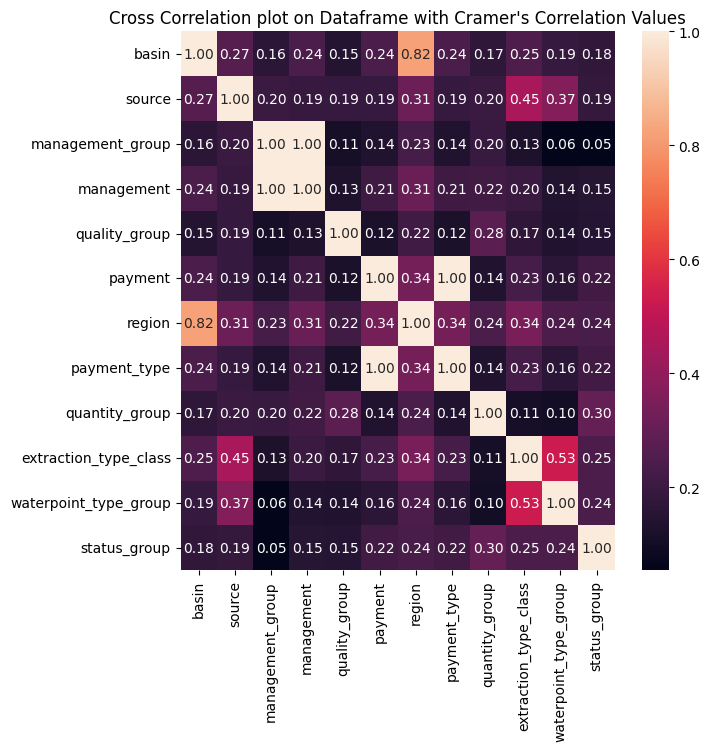

In [14]:
def cramerV(label,x):
    confusion_matrix = pd.crosstab(label, x)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r,k = confusion_matrix.shape
    phi2 = chi2/n
    phi2corr = max(0,phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r - 1) ** 2) / ( n - 1 )
    kcorr = k - ((k - 1) ** 2) / ( n - 1 )
    try:
        if min((kcorr - 1),(rcorr - 1)) == 0:
            warnings.warn(
            "Unable to calculate Cramer's V using bias correction. Consider not using bias correction",RuntimeWarning)
            v = 0
            print("If condition Met: ",v)
        else:
            v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
            print("Else condition Met: ",v)
    except:
        print("inside error")
        v = 0
    return v


def plot_cramer(df):
    cramer = pd.DataFrame(index=df.columns,columns=df.columns)
    for column_of_interest in df.columns:
        try:
            temp = {}

            columns = df.columns
            for j in range(0,len(columns)):
                v = cramerV(df[column_of_interest],df[columns[j]])
                cramer.loc[column_of_interest,columns[j]] = v
                if (column_of_interest==columns[j]):
                    pass
                else:
                    temp[columns[j]] = v
            cramer.fillna(value=np.nan,inplace=True)
        except:
            print('Dropping row:',column_of_interest)
            pass
    plt.figure(figsize=(7,7))
    sns.heatmap(cramer,annot=True,fmt='.2f')

    plt.title("Cross Correlation plot on Dataframe with Cramer's Correlation Values")
    plt.show()
    

       
plot_cramer(df_categorical)   